# **BCB 546x: Python Assignment**

##**Description**
###This notebook documents the script needed to complete the code provided in "sequence_translate.py" and documentation needed to understand the code. The tasks include: (1) translating cytochrome-b sequences to amino acids for each of the 12 species of penguins, (2) computing summaries of the amino acid molecular weight and GC content of these sequences, and (3) data visualization. 

##**Dependencies**
###The file(s) needed to run the script is/are: "sequence_translate.py", "penguins_mass.csv", and "penguins_cytb.fasta". 
###The package(s) need to run the script is/are: BioPython

##**Author**
###Jeniffer Louise Perea-Lopez

##**Date**
###Created: Tuesday, May 2, 2023 at 1:28 PM
###Modified: Friday, May 5, 2023 at 6:22 PM

In [211]:
#Import python and Biopython packages and modules
from Bio import SeqIO #import Biopython package SeqIO
from Bio.Data import CodonTable #import Biopython package CodonTable
from Bio import Seq #import Biopython package Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis #import ProteinAnalysis from ProtParam module
from Bio.SeqUtils import GC #import GC from Bio.SeqUtils module
import pandas as pd #import pandas package
import matplotlib.pyplot as plt #import matplotlib.pyplot package
import seaborn as sns #import seaborn package
import sys
!{sys.executable} -m pip install altair vega_datasets
import altair as alt #import altair package

#-- Functions --#

##**Function `get_sequences_from_file(fasta_fn)`**
###**Description:** Pulls sequence data and returns species names and corresponding sequence data from FASTA file

###**Arguments:**
* `fata_fn`: where the .fasta file is placed 

###**Return:** Species name and sequence data for the different species found in the .fasta file

###**Example of usage:**
    >>>fasta_fn = "example_file.fasta"
    >>>get_sequences_from_file(fasta_fn)

###**Output:**
    {'Species name' : Seq('ATGCATGCATGCATGCATGCATGCATGCATGC...TAA')}

In [212]:
def get_sequences_from_file(fasta_fn): #define new function mentioned above
    sequence_data_dict = {} #create an empty dictionary for sequence data
    for record in SeqIO.parse(fasta_fn, "fasta"): #for loop to identify sequences within .fasta file for each record 
        description = record.description.split() #assign function to split strings to variable
        species_name = description[1] + " " + description[2] #create species name from .fasta file
        sequence_data_dict[species_name] = record.seq #assign sequence to corresponding species name
    return(sequence_data_dict) #return dictionary

In [213]:
#table of genetic code found in the mitochondria of all vertebrata (e.g., penguins)
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
print(mito_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

##**Function `translate_sequences(string_nucleotides)`**
###**Description:** Translates a string of nucleotides to amino acids 

###**Arguments:**
* `string_nucleotides`: a string of nucleotides

###**Return:** A string of amino acids 

###**Example of usage:**
    >>>string_nucleotides = 'CCCGGTGTCGCTGCTCTCTCCGAGAAGAAGTAA'(NOTE: TAA is a stop codon)
    >>>translate_sequences(string_nucleotides)

###**Output:**
    'PGVAALSEKK' 

In [214]:
def translate_sequences(string_nucleotides): #define new function mentioned above
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #import codon table 
    aa_seq_string = "" #assign variable for amino acid sequences 
    for i in range (0, len(string_nucleotides), 3): #selects codons as multiples of 3 starting with 0
        codon = string_nucleotides[i] + string_nucleotides[i+1] + string_nucleotides[i+2] #define codon as a set of 3 nucleotides
        #NOTE: if the sequence has a stop codon at the end, it should be left off as it is a nonsense codon
        if codon == "TAA" or codon == "TAG" or codon == "AGA" or codon == "AGG": #identify stop codons 
            break # #terminate current loop at stop codon and resume execution for the next sequence
        else: #if loop did not encounter a break, statement will be executed after loop completes normally
            aa_seq_string += mito_table.forward_table[codon] #translate codons into amino acids 
    return(aa_seq_string) #retunrn amino acid sequence 

In [215]:
#Run example of usage
string_nucleotides = 'CCCGGTGTCGCTGCTCTCTCCGAGAAGAAGTAA'
translate_sequences(string_nucleotides)

'PGVAALSEKK'

##**Function `alt_translate_sequences(string_nucleotides)`**
###**Description:** Alternative method to translates a string of nucleotides to amino acids by converting nucelotide sequence to a string of amino acids

###**Arguments:**
* `string_nucleotides`: a string of nucleotides

###**Return:** A string of amino acids 

###**Example of usage:**
    >>>string_nucleotides = 'CCCGGTGTCGCTGCTCTCTCCGAGAAGAAGTAA'NOTE: TAA is a stop codon
    >>>alt_translate_sequences(string_nucleotides)

###**Output:**
    'PGVAALSEKK' 

###**Reference:** https://biopython.org/wiki/Seq

In [216]:
def alt_translate_sequences(string_nucleotides): #define new function mentioned above
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #import codon table 
    aa_seq_string = str(Seq.translate(string_nucleotides, mito_table)) [:-1] #converts nucleotide sequence, 
    #except the last element associated with the stop codon, to string of amino acids
    return(aa_seq_string)

In [217]:
#Run example of usage
string_nucleotides = 'CCCGGTGTCGCTGCTCTCTCCGAGAAGAAGTAA'
alt_translate_sequences(string_nucleotides)

'PGVAALSEKK'

##**Function `compute_molecular_weight(aa_seq)`**
###**Description:** Calculate the molecular weight of an amino acid sequence

###**Arguments:**
* `aa_seq`: a string of amino acids

###**Return:** molecular weight

###**Example of usage:**
    >>>aa_seq = 'PGVAALSEKK'
    >>>compute_molecular_weight(aa_seq)

###**Output:**
    999.1621
    
###**Reference:*** http://biopython.org/wiki/ProtParam

In [218]:
def compute_molecular_weight(aa_seq): #define new function mentioned above
    analysed_seq = ProteinAnalysis(aa_seq) #convert string of amino acids to a sequence object using ProteinAnalysis
    return(analysed_seq.molecular_weight()) #compute the molecular weight from an amino acid sequence

In [219]:
#Run example of usage 
aa_seq = 'PGVAALSEKK'
compute_molecular_weight(aa_seq)

999.1621

##**Function `compute_GC_content(string_nucleotides)`**
###**Description:** Calculate the GC content (proportion of "G" and "C") of a DNA sequence

###**Arguments:**
* `string_nucleotides`: a string of nucleotides

###**Return:** percent GC content 

###**Example of usage:**
    >>>string_nucleotides = 'CCCGGTGTCGCTGCTCTCTCCGAGAAGAAGTAA'
    >>>compute_GC_content(string_nucleotides)

###**Output:**
    57.57575757575758
    
###**Reference:** https://biopython.org/docs/1.75/api/Bio.SeqUtils.html#Bio.SeqUtils.GC

In [220]:
def compute_GC_content(string_nucleotides): #define new function mentioned above
    GC_content = GC(string_nucleotides) #calculate G+C content from string of nucleotides
    return(GC_content) #return GC content as %GC calculated against the full length

In [221]:
#Run example of usage
string_nucleotides = 'CCCGGTGTCGCTGCTCTCTCCGAGAAGAAGTAA'
compute_GC_content(string_nucleotides)

57.57575757575758

#-- In the MAIN part of the script --#

In [222]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") #pull sequence data from FASTA file and assign them to a dictionary 
penguins_df = pd.read_csv("penguins_mass.csv") #read .csv file into DataFrame, includes only data for body mass 
species_list = list(penguins_df.species) #creates a list of penguin species from DataFrame

In [223]:
#Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content 
#Set the value to 'NaN' to indicate that these cells are currently empty
penguins_df['molecular_weight'] = 'NaN'
penguins_df['GC_content'] = 'NaN'
print(penguins_df)

                    species   mass molecular_weight GC_content
0      Aptenodytes forsteri  28.00              NaN        NaN
1   Aptenodytes patagonicus  13.40              NaN        NaN
2       Eudyptes chrysocome   2.80              NaN        NaN
3     Eudyptes chrysolophus   4.50              NaN        NaN
4         Eudyptes sclateri   4.25              NaN        NaN
5           Eudyptula minor   1.60              NaN        NaN
6        Pygoscelis adeliae   4.60              NaN        NaN
7     Pygoscelis antarctica   4.10              NaN        NaN
8          Pygoscelis papua   6.10              NaN        NaN
9       Spheniscus demersus   3.20              NaN        NaN
10     Spheniscus humboldti   4.75              NaN        NaN
11  Spheniscus magellanicus   3.40              NaN        NaN


In [224]:
#Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
#of each translated sequence and adds those data to DataFrame
row = 0 #define row as the first row '0'
for key, value in cytb_seqs.items(): 
    aa_seq = translate_sequences(value) #translate penguin DNA sequence to amino acid sequence
    molecular_weight = compute_molecular_weight(aa_seq) #compute MW of amino acid sequence
    penguins_df.loc[row, 'molecular_weight'] = molecular_weight #add MW to DataFrame
    GC_content = compute_GC_content(value) #compute %GC of DNA sequence 
    penguins_df.loc[row, 'GC_content'] = GC_content #add GC content to DataFrame
    row = row + 1 #define row for looping through rows in DataFrame
print(penguins_df)

                    species   mass molecular_weight GC_content
0      Aptenodytes forsteri  28.00       42459.6021  48.381452
1   Aptenodytes patagonicus  13.40       42563.7067  49.693788
2       Eudyptes chrysocome   2.80       42475.5753  51.181102
3     Eudyptes chrysolophus   4.50       42445.5493  50.918635
4         Eudyptes sclateri   4.25       42475.5753  50.831146
5           Eudyptula minor   1.60       42491.6408  49.256343
6        Pygoscelis adeliae   4.60        42458.614  49.081365
7     Pygoscelis antarctica   4.10       42404.5423  47.769029
8          Pygoscelis papua   6.10       42595.8759  47.156605
9       Spheniscus demersus   3.20        42431.549  48.293963
10     Spheniscus humboldti   4.75        42399.552  49.256343
11  Spheniscus magellanicus   3.40       42459.6021  48.206474


<Axes: title={'center': 'Mass of Penguin Species'}, xlabel='species', ylabel='mass'>

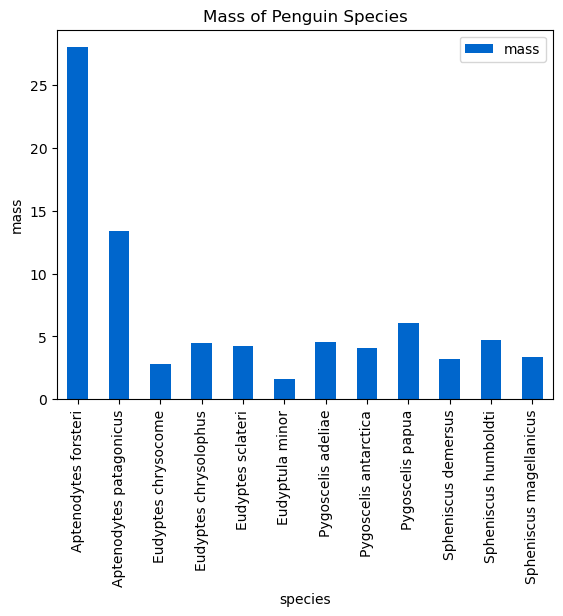

In [231]:
#Plot a bar-chart of the mass with the x-axes labeled with species names
penguins_df.plot(kind = 'bar', x = 'species', y = 'mass', ylabel = 'mass', color = '#0066cc', 
                 title = 'Mass of Penguin Species')

In [238]:
#Using Vega visualization to highligh the smallest penguin species 
alt.Chart(penguins_df, title = "Mass of Penguin Species").mark_bar().encode(
    x='species:O',
    y="mass:Q",
    #highlight smallest penguin species
    color=alt.condition(
        alt.datum.species == 'Eudyptula minor',  #If the species is "Eudyptula minor" this test returns True,
        alt.value('#FF6600'),     #highlight a bar with orange (#FF6600)
        alt.value('#0066cc')   #And blue (#0066cc) for the rest of the bars
     )
).properties(width=600).configure_axis(
    labelFontSize=16,
    titleFontSize=16
).configure_title(fontSize=16)

alt.Chart(...)

###**Q1. What is the smallest penguin species?**
###*Eudyptula minor*

###**Q2. What is the geographical range of this species?**
###Found in the coastal waters of southern mainland Australia and Tasmania (https://australian.museum/learn/animals/birds/little-penguin-eudyptula-minor/)

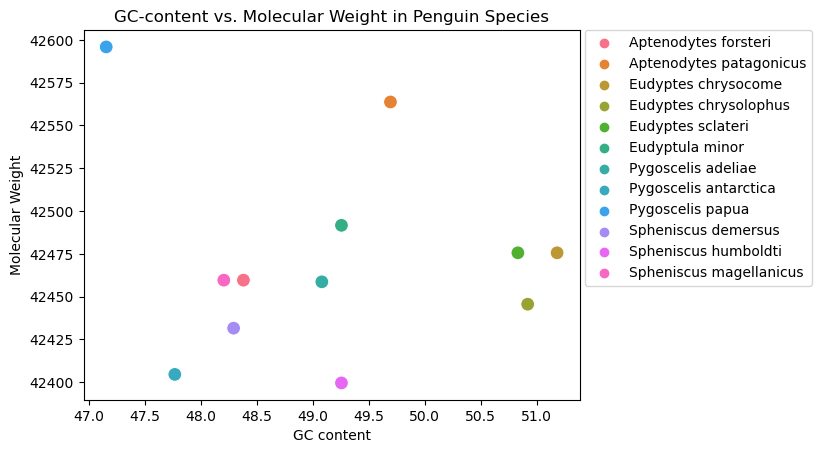

In [226]:
#Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis)
sns.scatterplot(x = "GC_content", y = "molecular_weight", data = penguins_df, s = 100, hue = "species")
plt.xlabel("GC content")
plt.ylabel("Molecular Weight")
plt.title("GC-content vs. Molecular Weight in Penguin Species")
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

In [227]:
#Save the new DataFrame to a file called "penguins_mass_cytb.csv"
penguins_df.to_csv("penguins_mass_cytb.csv")

###**BONUS:What else can we do with this dataset in python?**
####Objective: Align multiple sequences within a FASTA file
####Reference: https://biopython.org/docs/1.76/api/Bio.Align.Applications.html

In [228]:
from Bio.Align.Applications import MuscleCommandline

In [229]:
def align_seqs(fasta_fn): #define new function for sequence alignment
    seqs = SeqIO.parse(fasta_fn, 'fasta') #identify sequences in FASTA file 
    SeqIO.write(seqs, "align_seqs.fasta", "fasta") #write FASTA file with aligned sequences
    muscle_cmdline = MuscleCommandline(input = seqs, diags = True, maxiters = 1, 
                                       out = "align_seqs.fasta")
    #use multiple alignment program MUSCLE to align sequences and output FASTA file
    return('Alignment Complete!') #output message

In [230]:
fasta_fn = "penguins_cytb.fasta"
align_seqs(fasta_fn)

'Alignment Complete!'